In [145]:
# Imports

import glob
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy

In [146]:
# Constantes

IMAGE_SIZE = 300
CLASSES = ['TOEI', 'GB', 'WIT']

In [147]:
!git clone https://github.com/Cooleure/BD_Animes.git
files_path = "./BD_Animes/"

fatal: destination path 'BD_Animes' already exists and is not an empty directory.


In [148]:
# Load data

def load_data(folder_path, classes, image_size=64):

  # Place aléatoirement les images dans les sous-ensembles train, validation et test
  # En récupérant les images dans chaque dossier film

  # Initialisation des sous-ensembles
  train = {'x': [], 'y': []}
  validation = {'x': [], 'y': []}
  test = {'x': [], 'y': []}

  # Liste les dossiers de films présents dans le dossier path
  #movies_folder_path = [nom for nom in os.listdir(folder_path) if (os.path.isdir(os.path.join(folder_path, nom)) and not nom.startswith('.'))]
  #movies_folder_path = [os.path.join(folder_path, sub_folder) for sub_folder in movies_folder_path]

  files = glob.glob(folder_path + "/**/*.jpg", recursive = True)
  print(files)
  x_and_y_tuple = []
  # Load data pour chaque film
  for file in files:


    #x_and_y_tuple des images
    x_and_y_tuple.append(load_data_movie_file(file, classes, image_size))

  # Nombre d'images
  n = len(x_and_y_tuple)

  # Indices aléatoires
  indices = np.random.permutation(n)

  # Séparation des données
  train_indices = indices[:int(0.8*n)]
  validation_indices = indices[int(0.8*n):int(0.9*n)]
  test_indices = indices[int(0.9*n):]

  # Ajout des données
  train['x'] = [x_and_y_tuple[i][0] for i in train_indices ]
  train['y'] = [x_and_y_tuple[i][1] for i in train_indices ]
  validation['x'] = [x_and_y_tuple[i][0] for i in validation_indices ]
  validation['y'] = [x_and_y_tuple[i][1] for i in validation_indices ]
  test['x'] = [x_and_y_tuple[i][0] for i in test_indices ]
  test['y'] = [x_and_y_tuple[i][1] for i in test_indices ]

  return train, validation, test

def load_data_movie_file(file, classes, image_size=64):

  # Lecture de l'image + mise à l'échelle
  img = Image.open(file)
  img = img.resize((image_size, image_size), Image.LANCZOS)

  # Image + Label
  x = np.asarray(img)
  y = load_label(file, classes)

  return x, y

def load_label(path, classes):
  img_path_split = path.split('/')
  img_name_split = img_path_split[-1].split('_')
  return classes.index(img_name_split[0])


In [149]:
# Data subsets

# Train, validation, test
train, val, test = load_data(files_path, CLASSES, image_size=IMAGE_SIZE)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
train['x'] = np.array(train['x'])
val['x'] = np.array(val['x'])
test['x'] = np.array(test['x'])

train['y'] = np.array(train['y'])
val['y'] = np.array(val['y'])
test['y'] = np.array(test['y'])

['./BD_Animes/GB/KIKI/GB_KIKI_441.jpg', './BD_Animes/GB/KIKI/GB_KIKI_902.jpg', './BD_Animes/GB/KIKI/GB_KIKI_632.jpg', './BD_Animes/GB/KIKI/GB_KIKI_484.jpg', './BD_Animes/GB/KIKI/GB_KIKI_169.jpg', './BD_Animes/GB/KIKI/GB_KIKI_293.jpg', './BD_Animes/GB/KIKI/GB_KIKI_1017.jpg', './BD_Animes/GB/KIKI/GB_KIKI_155.jpg', './BD_Animes/GB/KIKI/GB_KIKI_474.jpg', './BD_Animes/GB/KIKI/GB_KIKI_976.jpg', './BD_Animes/GB/KIKI/GB_KIKI_895.jpg', './BD_Animes/GB/KIKI/GB_KIKI_104.jpg', './BD_Animes/GB/KIKI/GB_KIKI_512.jpg', './BD_Animes/GB/KIKI/GB_KIKI_331.jpg', './BD_Animes/GB/KIKI/GB_KIKI_891.jpg', './BD_Animes/GB/KIKI/GB_KIKI_23.jpg', './BD_Animes/GB/KIKI/GB_KIKI_806.jpg', './BD_Animes/GB/KIKI/GB_KIKI_52.jpg', './BD_Animes/GB/KIKI/GB_KIKI_721.jpg', './BD_Animes/GB/KIKI/GB_KIKI_428.jpg', './BD_Animes/GB/KIKI/GB_KIKI_846.jpg', './BD_Animes/GB/KIKI/GB_KIKI_80.jpg', './BD_Animes/GB/KIKI/GB_KIKI_399.jpg', './BD_Animes/GB/KIKI/GB_KIKI_749.jpg', './BD_Animes/GB/KIKI/GB_KIKI_751.jpg', './BD_Animes/GB/KIKI/GB_KI

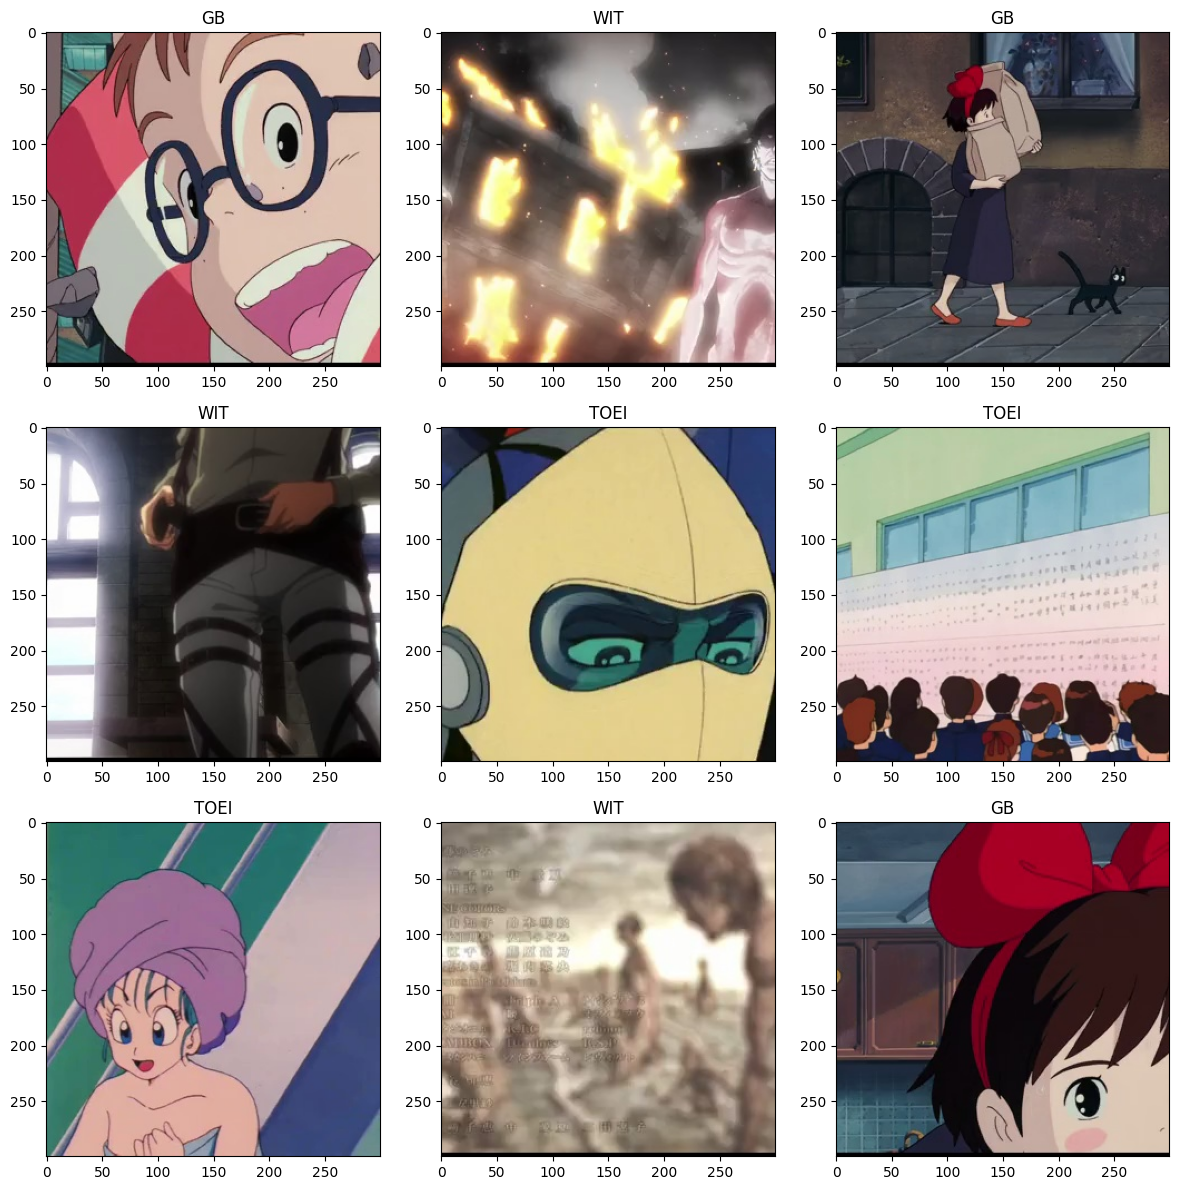

In [150]:
# Randomisation des indices

indices = np.arange(len(train['x']))
np.random.shuffle(indices)

# Affichage de 9 images aléatoires de la base d'apprentissage
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    random_index = indices[i]  # Utiliser les indices aléatoires
    plt.title(CLASSES[int(train['y'][random_index])])
    plt.imshow(train['x'][random_index])
plt.tight_layout()
plt.show()

In [151]:
# Reshape
from keras.utils import to_categorical
train['y'] = to_categorical(train['y'])
val['y'] = to_categorical(val['y'])


In [152]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5
model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense
model.add(Dense(512, activation='relu'))   # Couche dense, à 512 neurones
model.add(Dense(3, activation='softmax'))   # Couche de sortie

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 35, 35, 64)      

In [153]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [154]:
history = model.fit(train['x'], train['y'], validation_data=(val['x'], val['y']), epochs=30, batch_size=100)

Epoch 1/30
46/46 [==============================] - 19s 254ms/step - loss: 6.3218 - accuracy: 0.4538 - val_loss: 0.9106 - val_accuracy: 0.5732
Epoch 2/30
46/46 [==============================] - 6s 137ms/step - loss: 0.7611 - accuracy: 0.6663 - val_loss: 0.8107 - val_accuracy: 0.6226
Epoch 3/30
46/46 [==============================] - 6s 137ms/step - loss: 0.6097 - accuracy: 0.7523 - val_loss: 0.5720 - val_accuracy: 0.7531
Epoch 4/30
46/46 [==============================] - 6s 140ms/step - loss: 0.4482 - accuracy: 0.8303 - val_loss: 0.6769 - val_accuracy: 0.6931
Epoch 5/30
46/46 [==============================] - 7s 141ms/step - loss: 0.4102 - accuracy: 0.8349 - val_loss: 0.5417 - val_accuracy: 0.7707
Epoch 6/30
46/46 [==============================] - 6s 135ms/step - loss: 0.3503 - accuracy: 0.8633 - val_loss: 0.4737 - val_accuracy: 0.8042
Epoch 7/30
46/46 [==============================] - 6s 134ms/step - loss: 0.2470 - accuracy: 0.9101 - val_loss: 0.5044 - val_accuracy: 0.7884
Epoch

In [155]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

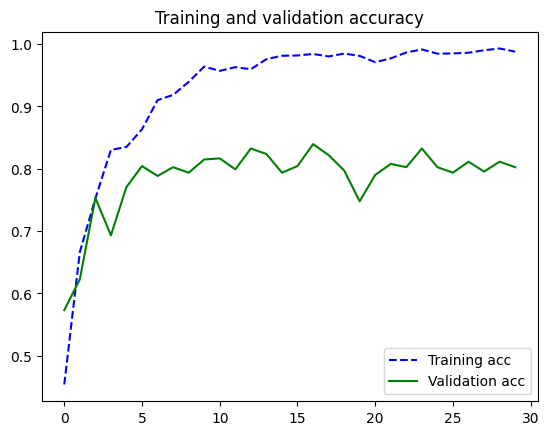

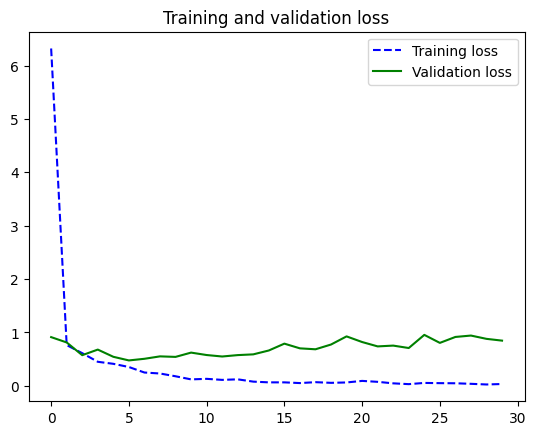

In [156]:
plot_training_analysis()

18/18 [==============================] - 1s 40ms/step


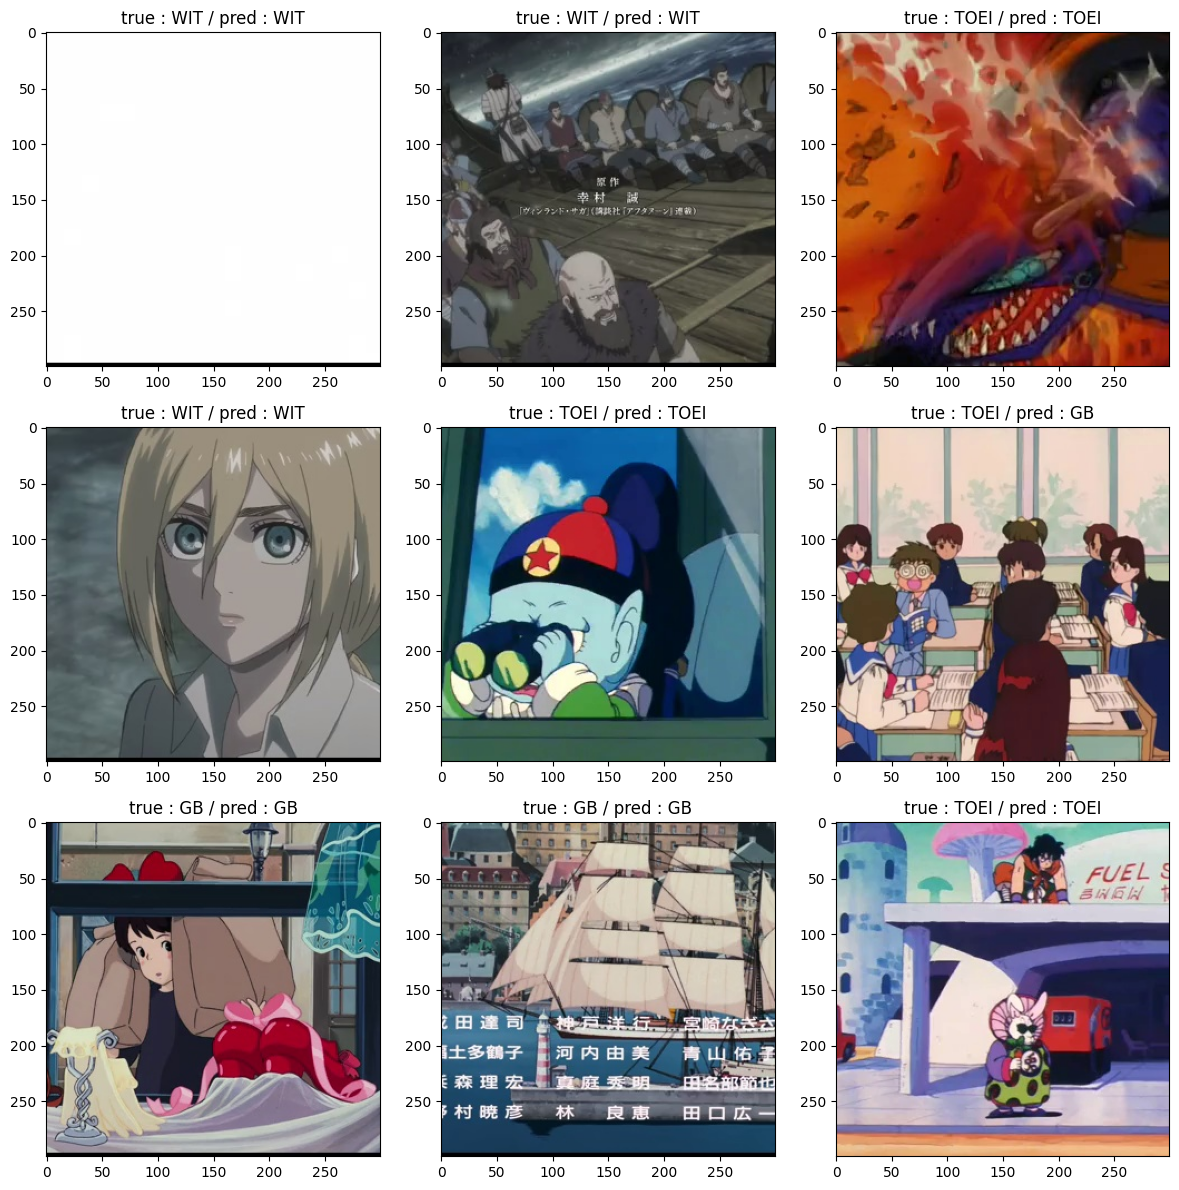

In [157]:
indices = np.arange(len(test['x']))
np.random.shuffle(indices)

plt.figure(figsize=(12, 12))
predictions = model.predict(test['x'])

for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    random_index = indices[i]  # Utiliser les indices aléatoires

    classe_attendue = str(CLASSES[int(test['y'][random_index])])
    classe_predite = str(CLASSES[np.argmax(predictions[random_index])])

    plt.title("true : " + classe_attendue + " / pred : " + classe_predite)
    plt.imshow(test['x'][random_index])

plt.tight_layout()
plt.show()